# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()



X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split as tts


X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



Note: you may need to restart the kernel to use updated packages.


((16512, 8), (4128, 8), (16512, 1), (4128, 1))

In [4]:
# from sklearn.preprocessing import StandardScaler


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train) 
linreg.fit(X_test, y_test) 


LinearRegression()

In [6]:

from sklearn.ensemble import RandomForestRegressor as RFR 
rfr = RFR()    
rfr.fit(X_train, y_train)      
y_pred = rfr.predict(X_test) 


c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
from sklearn.metrics import mean_squared_error as mse  
y_pred = linreg.predict(X_test) 

mse(y_test, y_pred,squared=False)

0.7275531683603939

## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
from sklearn.metrics import mean_squared_error as msle  
y_pred = linreg.predict(X_test) 

msle(y_test, y_pred,squared=True)

0.5293336127912476

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

0.5289426614283451

## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [11]:
from sklearn.model_selection import train_test_split as tts
X_test,X_train,y_test,y_train=tts(X,y,
                                  train_size=0.8,
                                  test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [35]:
from sklearn.linear_model import LogisticRegression as logreg
logreg = logreg()    
logreg.fit(X_train, y_train)      
y_pred = logreg.predict(X_test) 
y_pred_logreg = logreg.predict(X_test)  
y_prob = logreg.predict_proba(X_test) 

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [13]:
from sklearn.metrics import accuracy_score


In [14]:
y_train_pred = logreg.predict(X_train)

In [15]:
y_test_pred = logreg.predict(X_test)

In [16]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

Training Accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [19]:
from sklearn.metrics import balanced_accuracy_score as clf
clf=clf()
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print('Training Balanced Accuracy:', train_balanced_accuracy)

test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print('Testing Balanced Accuracy:', test_balanced_accuracy)

TypeError: missing a required argument: 'y_true'

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score


y_train_pred = logreg.predict(X_train)

y_test_pred = logreg.predict(X_test)

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print('Training Balanced Accuracy:', train_balanced_accuracy)

test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print('Testing Balanced Accuracy:', test_balanced_accuracy)


Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9504065040650406


## 10. Calculate and print the precision score for both the training and the testing set.

In [33]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred_logreg)


0.95

In [37]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred_logreg,average='micro')

0.95

## 11. Calculate and print the recall score for both the training and the testing set.

In [43]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_logreg,average='micro')

0.95

## 12. Calculate and print the F1 score for both the training and the testing set.

In [44]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_logreg,average='micro')

0.9500000000000001

## 13. Generate confusion matrices for both the training and the testing set.

In [45]:
from sklearn.metrics import confusion_matrix as cm


cm(y_test, y_pred_logreg)

array([[39,  0,  0],
       [ 0, 36,  4],
       [ 0,  2, 39]], dtype=int64)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

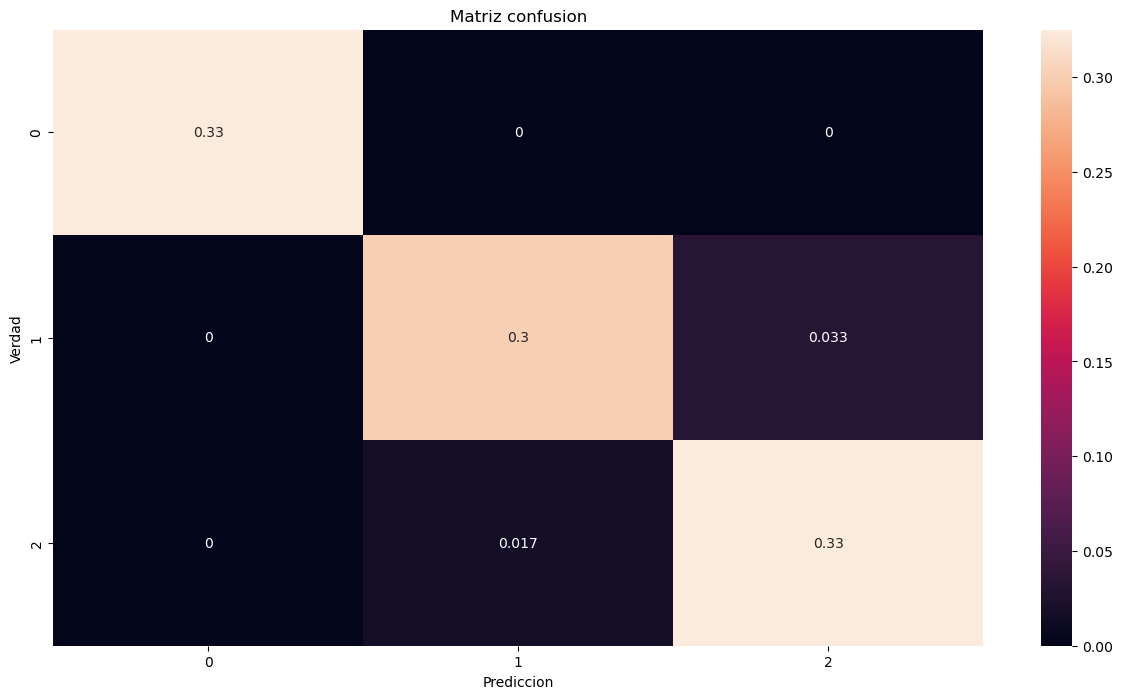

In [48]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_logreg)/cm(y_test, y_pred_logreg).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.